In [1]:
import pandas as pd
import missingno as msg

In [2]:
df1 = pd.read_csv('2015-building-energy-benchmarking.csv')

In [3]:
pd.set_option('display.max_row', df1.shape[0])
pd.set_option('display.max_column', df1.shape[1])

In [14]:
df2 = pd.read_csv('2016-building-energy-benchmarking.csv')

## OBJECTIF --> prédire les émissions de CO2 et la consommation totale d’énergie

In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [21]:
#df2.info()

In [20]:
#df1.columns

In [4]:
df1.head(3)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   

           PropertyName TaxParcelIdentificationNumber  \
0  MAYFLOWER PARK HOTEL                     659000030   
1       PARAMOUNT HOTEL                     659000220   
2          WESTIN HOTEL                     659000475   

                                            Location  CouncilDistrictCode  \
0  {'latitude': '47.61219025', 'longitude': '-122...                    7   
1  {'latitude': '47.61310583', 'longitude': '-122...                    7   
2  {'latitude': '47.61334897', 'longitude': '-122...                    7   

  Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN       1927                  1            12.0   
1     DOWNTOWN       1996                  1            11.0   
2     DOWNTOWN       1969                  1            41.0   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   
2            961990                   0                  961990   

       ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                          Hotel                  Hotel   
1     Hotel, Parking, Restaurant                  Hotel   
2  Hotel, Parking, Swimming Pool                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0                          NaN   
1                    83880.0                      Parking   
2                   757243.0                      Parking   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              NaN                         NaN   
1                          15064.0                  Restaurant   
2                         100000.0               Swimming Pool   

   ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
0                             NaN                      NaN             65.0   
1                          4622.0                      NaN             51.0   
2                             0.0                      NaN             18.0   

   SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0              78.9                80.3               173.5   
1              94.4                99.0               191.3   
2              96.6                99.7               242.7   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0                 175.1            6981428.0              7097539.0   
1                 195.2            8354235.0              8765788.0   
2                 246.5           73130656.0             75506272.0   

   SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
0       2023032.0         1080307.0          3686160.0             12724.0   
1             0.0         1144563.0          3905411.0             44490.0   
2      19660404.0        14583930.0         49762435.0             37099.0   

   NaturalGas(kBtu)  OtherFuelUse(kBtu)  GHGEmissions(MetricTonsCO2e)  \
0         1272388.0                 0.0                        249.43   
1         4448985.0                 0.0                        263.51   
2         3709900.0                 0.0                       2061.48   

   GHGEmissionsIntensity(kgCO2e/ft2) DefaultData Comment ComplianceStatus  \
0                               2.64          No     NaN        Compliant   
1                               2.38          No     NaN        Compliant   
2                               1.92         Yes     NaN        Compliant   

  Outlier  2010 Census Tracts  \
0     NaN                 NaN   
1     NaN                 NaN   
2     NaN                 NaN   

   Seattle Police Depart

## NETTOYAGE


1 - Fillltrons les données de telle sorte qu'on ait uniquement les batiments 'non residential'

In [5]:
df1[df1['BuildingType'] == 'NonResidential'].shape
df1 = df1[df1['BuildingType'] == 'NonResidential']

In [6]:
df1.shape

(1461, 47)

In [16]:
df2 = df2[df2['BuildingType'] == 'NonResidential']
df2.shape

(1460, 46)

Nous voila notre premier filtre réalisé

On va proceder à élimination des variables qui nous avanceraient pas dans notre travail

In [7]:
df1 = df1.drop(columns=['BuildingType','OSEBuildingID', 'DataYear', 'PropertyName', 'Location', 'CouncilDistrictCode', 'NumberofBuildings', 'TaxParcelIdentificationNumber',
                        'ListOfAllPropertyUseTypes','YearsENERGYSTARCertified', 'Comment', 'Outlier', 'City Council Districts', 'OtherFuelUse(kBtu)',
                        'Seattle Police Department Micro Community Policing Plan Areas', '2010 Census Tracts', 'Zip Codes', 'SPD Beats'])

In [8]:
df1.shape

(1461, 29)

In [17]:
df2 = df2.drop(columns=['BuildingType','OSEBuildingID', 'DataYear', 'PropertyName', 'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber', 
                  'CouncilDistrictCode', 'Latitude', 'Longitude', 'NumberofBuildings', 'ListOfAllPropertyUseTypes', 
                  'YearsENERGYSTARCertified', 'Comments', 'Outlier'])

In [18]:
df2.shape

(1460, 29)

<AxesSubplot:>

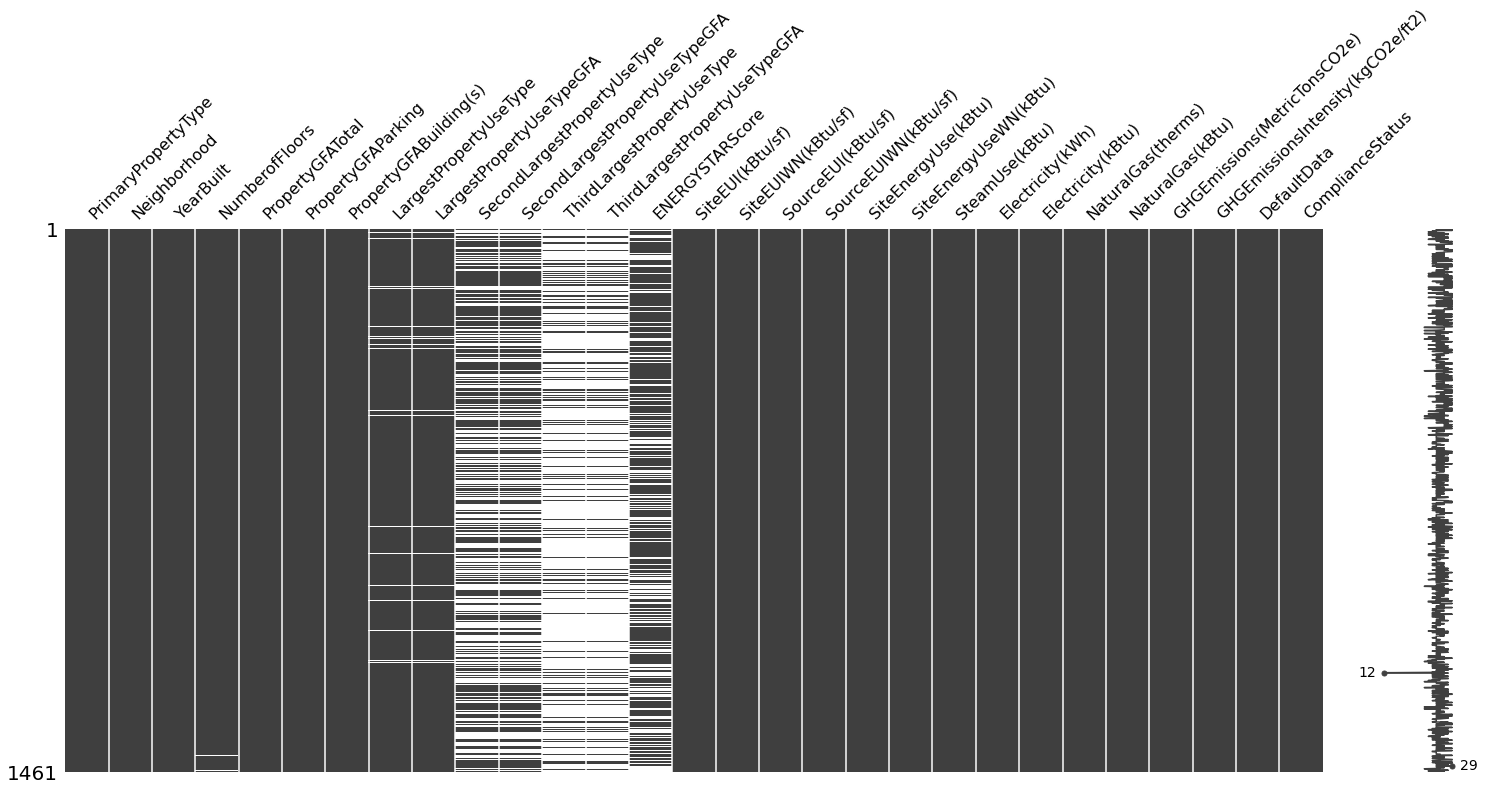

In [9]:
msg.matrix(df1)

In [10]:
pd.DataFrame(df1.isna().mean().round(4) * 100,
             columns=['Données manquantes en %'
                      ]).sort_values(by='Données manquantes en %',
                                     ascending=False)

Données manquantes en %
ThirdLargestPropertyUseType                          79.33
ThirdLargestPropertyUseTypeGFA                       79.33
SecondLargestPropertyUseType                         47.78
SecondLargestPropertyUseTypeGFA                      47.78
ENERGYSTARScore                                      30.66
LargestPropertyUseType                                4.18
LargestPropertyUseTypeGFA                             4.18
NumberofFloors                                        0.27
SiteEUIWN(kBtu/sf)                                    0.07
SteamUse(kBtu)                                        0.07
SiteEnergyUseWN(kBtu)                                 0.07
SiteEnergyUse(kBtu)                                   0.07
SourceEUIWN(kBtu/sf)                                  0.07
SourceEUI(kBtu/sf)                                    0.07
SiteEUI(kBtu/sf)                                      0.07
NaturalGas(therms)                                    0.07
Electricity(kBtu)                                     0.07
NaturalGas(kBtu)                                      0.07
GHGEmissions(MetricTonsCO2e)                          0.07
GHGEmissionsIntensity(kgCO2e/ft2)                     0.07
DefaultData                                           0.07
Electricity(kWh)                                      0.07
PrimaryPropertyType                                   0.00
Neighborhood                                          0.00
PropertyGFABuilding(s)                                0.00
PropertyGFAParking                                    0.00
PropertyGFATotal                                      0.00
YearBuilt                                             0.00
ComplianceStatus                                      0.00

In [26]:
# Filtrons nos données pour ne garder que celles utilisables
df1 = df1[df1.columns[df1.isna().mean()<=0.5]]
df1.shape

(1461, 27)

<AxesSubplot:>

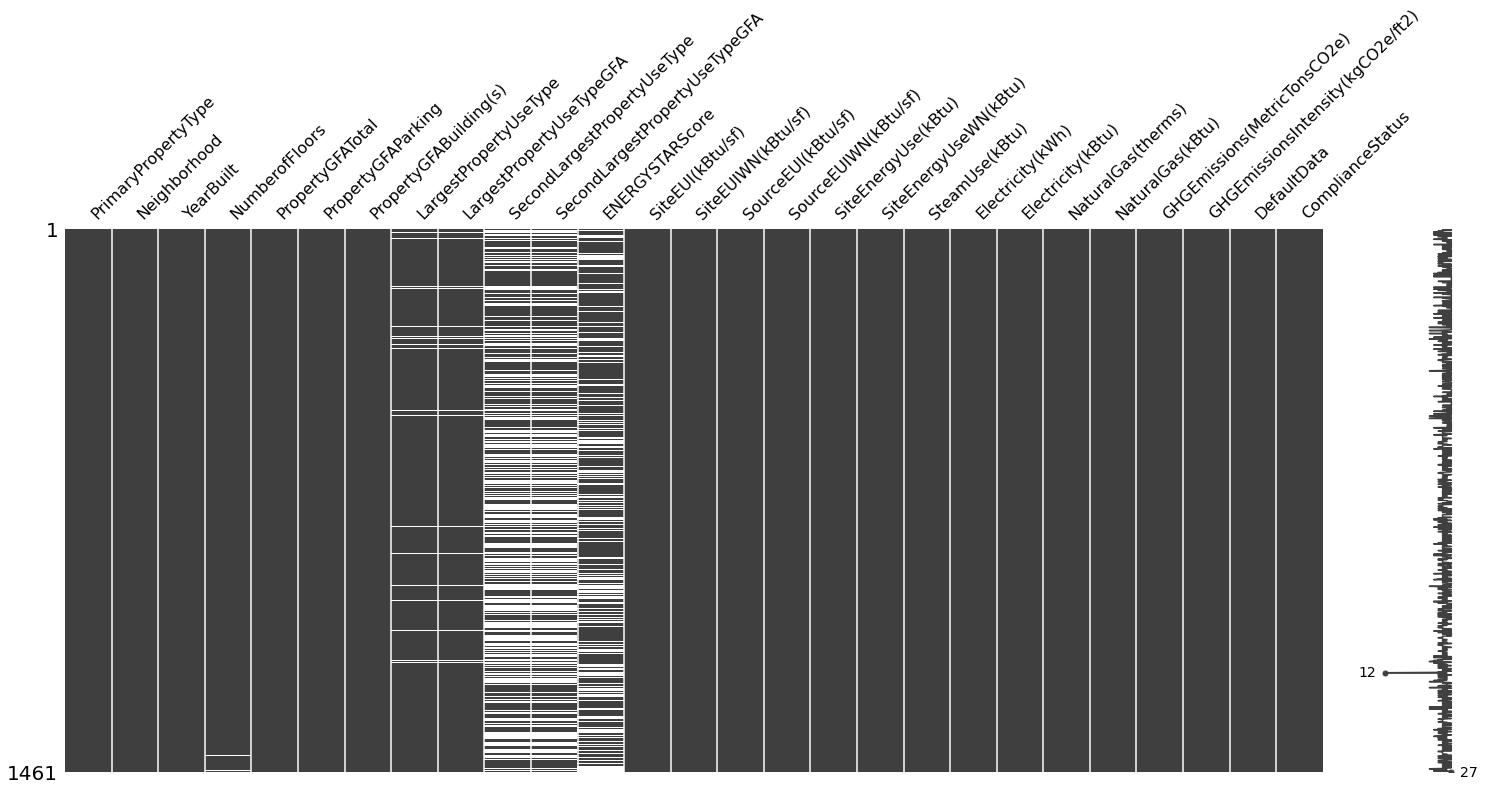

In [12]:
msg.matrix(df1)

In [22]:
#df2.head(3)

In [23]:
#msg.matrix(df2)

In [24]:
"""pd.DataFrame(df2.isna().mean().round(4) * 100,
             columns=['Données manquantes en %'
                      ]).sort_values(by='Données manquantes en %',
                                     ascending=False)"""

"pd.DataFrame(df2.isna().mean().round(4) * 100,\n             columns=['Données manquantes en %'\n                      ]).sort_values(by='Données manquantes en %',\n                                     ascending=False)"

In [27]:
df2 = df2[df2.columns[df2.isna().mean() <= 0.5]]

df2.shape

(1460, 27)

In [25]:
#msg.matrix(df2)

A présent on va passer à la jointure de nos deux datasets ie (celui de 2015 et de 2016)

In [28]:
len(set(df1.columns.to_list() + df2.columns.to_list()))

29

In [29]:
[print(x) for x in df1.columns if x not in df2.columns]

GHGEmissions(MetricTonsCO2e)
GHGEmissionsIntensity(kgCO2e/ft2)


[None, None]

In [30]:
[print(x) for x in df2.columns if x not in df1.columns]

TotalGHGEmissions
GHGEmissionsIntensity


[None, None]

On se rend compte qu'on a deux colonnes qui serait fort probablement les mêmes

leur différence serait due à une erreur de saisi ...

On peut donc renommer ces colonnes de telle sorte qu'elles aient les mêmes noms




In [31]:
df1.columns

Index(['PrimaryPropertyType', 'Neighborhood', 'YearBuilt', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', 'ComplianceStatus'],
      dtype='object')

In [35]:
df1 = df1.drop(columns=['SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA'])
df1.columns = ['PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'DefaultData', 'ComplianceStatus']

In [36]:
df2 = df2.drop(columns=['SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA'])
df2.columns = ['PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus',
       'TotalGHGEmissions', 'GHGEmissionsIntensity']

In [37]:
[print(x) for x in df2.columns if x not in df1.columns]

[]

In [38]:
[print(x) for x in df1.columns if x not in df2.columns]

[]

In [39]:
len(set(df1.columns.to_list() + df2.columns.to_list()))

25

In [101]:
df3 = pd.merge(df1, df2, how='outer')

In [102]:
df3.shape

(2921, 25)

On a bien réalisé la jointure de nos deux datasets

Passons à présent au traitement des valeurs Nan dans le nouveau Dataset

### 1 - Traitement des valeur manquantes

<AxesSubplot:>

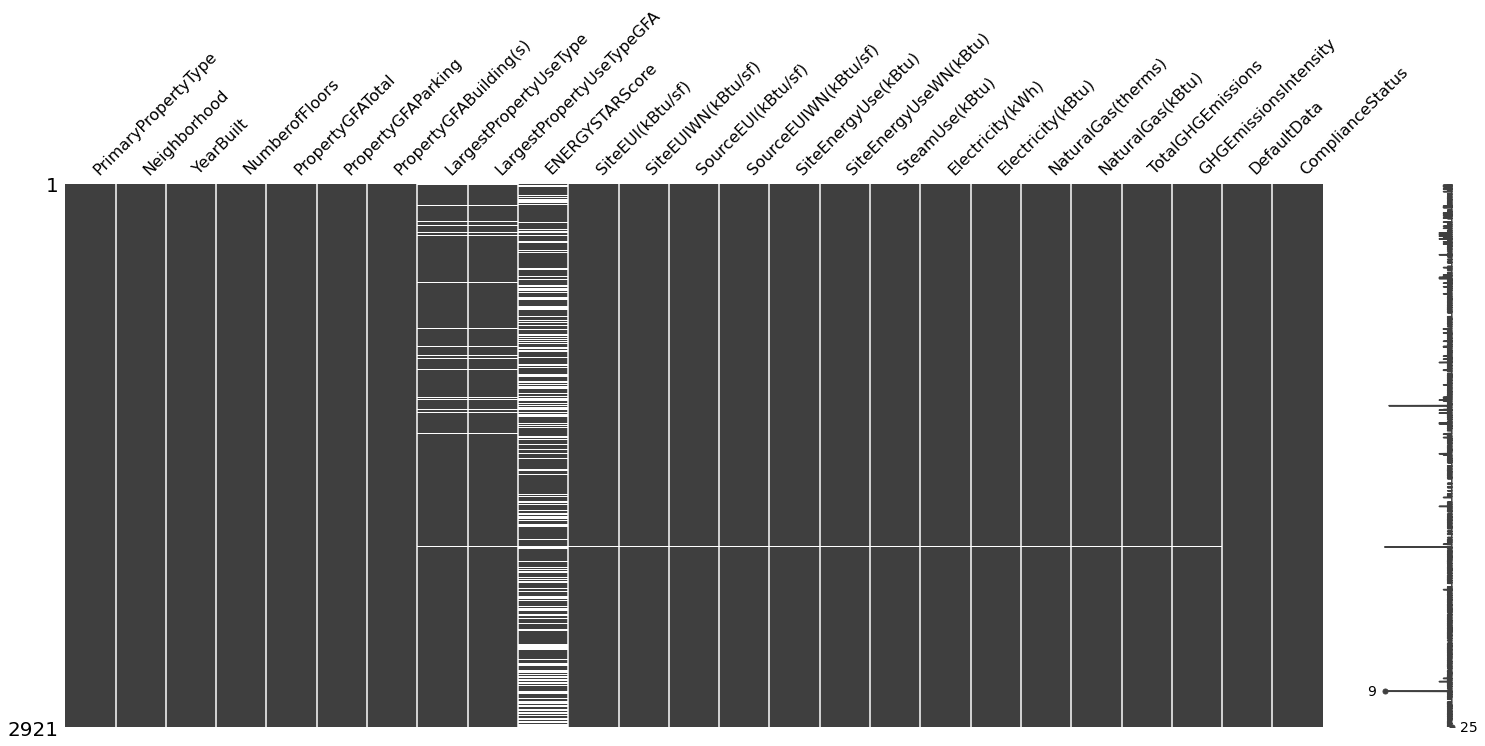

In [42]:
msg.matrix(df3)

In [43]:
pd.DataFrame(df3.isna().mean().round(4) * 100,
             columns=['Données manquantes en %'
                      ]).sort_values(by='Données manquantes en %',
                                     ascending=False)

Données manquantes en %
ENERGYSTARScore                              31.26
LargestPropertyUseType                        2.29
LargestPropertyUseTypeGFA                     2.29
SiteEUIWN(kBtu/sf)                            0.14
NumberofFloors                                0.14
SiteEnergyUseWN(kBtu)                         0.14
SiteEUI(kBtu/sf)                              0.14
SteamUse(kBtu)                                0.10
SiteEnergyUse(kBtu)                           0.10
SourceEUIWN(kBtu/sf)                          0.10
NaturalGas(therms)                            0.10
SourceEUI(kBtu/sf)                            0.10
Electricity(kBtu)                             0.10
NaturalGas(kBtu)                              0.10
TotalGHGEmissions                             0.10
GHGEmissionsIntensity                         0.10
Electricity(kWh)                              0.10
DefaultData                                   0.03
PrimaryPropertyType                           0.00
Neighborhood                                  0.00
PropertyGFABuilding(s)                        0.00
PropertyGFAParking                            0.00
PropertyGFATotal                              0.00
YearBuilt                                     0.00
ComplianceStatus                              0.00

On constate qu'on a qu'une variable ' qui plus de 20% de données manquantes

comme strategie de gestion de Nan, on va faire un fillna par la médiane

Ensuite on fera une suppression des données manquantes car on a moins de 5% de Nan sur les autres colonnes

In [103]:
df3['ENERGYSTARScore'].fillna(df3['ENERGYSTARScore'].mean)

0                                                      65
1                                                      51
2                                                      18
3                                                       1
4                                                      67
5                                                      25
6       <bound method Series.mean of 0        65.0\n1 ...
7                                                      46
8                                                      48
9                                                      32
10                                                     39
11                                                     56
12                                                     14
13      <bound method Series.mean of 0        65.0\n1 ...
14                                                     30
15      <bound method Series.mean of 0        65.0\n1 ...
16                                                     83
17            

On remarque que la transformation réalisée sur la colonne n'a pas donnée le résultat estompé

Parce que le type de la colonne n'est pas numérique

Convertissons alors le type de la colonne 'ENERGYSTARScore' en float64

In [104]:
import numpy as np
df3.astype({'ENERGYSTARScore': np.float64})


PrimaryPropertyType           Neighborhood  YearBuilt  \
0                           Hotel               DOWNTOWN       1927   
1                           Hotel               DOWNTOWN       1996   
2                           Hotel               DOWNTOWN       1969   
3                           Hotel               DOWNTOWN       1926   
4                           Hotel               DOWNTOWN       1980   
5                           Hotel               DOWNTOWN       1926   
6                           Other               DOWNTOWN       1926   
7                           Hotel               DOWNTOWN       1904   
8                           Hotel               DOWNTOWN       1969   
9                           Hotel               DOWNTOWN       1998   
10                          Hotel               DOWNTOWN       1928   
11                          Hotel               DOWNTOWN       1980   
12                          Hotel               DOWNTOWN       1922   
13                          Other               DOWNTOWN       1930   
14                          Hotel               DOWNTOWN       1983   
15             Mixed Use Property               DOWNTOWN       1907   
16                          Hotel               DOWNTOWN       1916   
17                          Other               DOWNTOWN       1916   
18                          Other               DOWNTOWN       1985   
19                          Hotel              NORTHEAST       2001   
20             College/University               DOWNTOWN       1928   
21                          Other               DOWNTOWN       1930   
22                          Hotel                   EAST       1991   
23                          Hotel               DOWNTOWN       2001   
24                          Hotel               DOWNTOWN       1978   
25    Small- and Mid-Sized Office             LAKE UNION       1906   
26                          Hotel              NORTHEAST       1994   
27        Self-Storage Facility\n              NORTHEAST       1955   
28            Distribution Center       GREATER DUWAMISH       1961   
29    Small- and Mid-Sized Office                BALLARD       1961   
30    Small- and Mid-Sized Office       GREATER DUWAMISH       1900   
31                    K-12 School              NORTHWEST       1954   
32        Self-Storage Facility\n               DOWNTOWN       1911   
33                          Hotel               DOWNTOWN       1969   
34                   Large Office               DOWNTOWN       1973   
35                   Retail Store               DOWNTOWN       1920   
36    Small- and Mid-Sized Office               DOWNTOWN       1910   
37             Mixed Use Property               DOWNTOWN       1926   
38                          Hotel               DOWNTOWN       1930   
39                          Hotel               DOWNTOWN       1982   
40                          Hotel               DOWNTOWN       1985   
41                          Hotel               DOWNTOWN       1908   
42                          Hotel             LAKE UNION       1959   
43                          Hotel             LAKE UNION       2000   
44                          Hotel             LAKE UNION       1997   
45                          Hotel  MAGNOLIA / QUEEN ANNE       1998   
46                    K-12 School                   EAST       1911   
47                          Hotel  MAGNOLIA / QUEEN ANNE       1999   
48    Small- and Mid-Sized Office                CENTRAL       1962   
49          Senior Care Community              SOUTHWEST       1922   
50          Senior Care Community              NORTHWEST       1970   
51                          Hotel             LAKE UNION       2008   
52                 Medical Office                   EAST       1965   
53                          Hotel                   EAST       1908   
54             Mixed Use Property                   EAST       1983   
55                   Retail Store     

In [46]:
df3.dtypes

PrimaryPropertyType           object
Neighborhood                  object
YearBuilt                      int64
NumberofFloors               float64
PropertyGFATotal               int64
PropertyGFAParking             int64
PropertyGFABuilding(s)         int64
LargestPropertyUseType        object
LargestPropertyUseTypeGFA    float64
ENERGYSTARScore              float64
SiteEUI(kBtu/sf)             float64
SiteEUIWN(kBtu/sf)           float64
SourceEUI(kBtu/sf)           float64
SourceEUIWN(kBtu/sf)         float64
SiteEnergyUse(kBtu)          float64
SiteEnergyUseWN(kBtu)        float64
SteamUse(kBtu)               float64
Electricity(kWh)             float64
Electricity(kBtu)            float64
NaturalGas(therms)           float64
NaturalGas(kBtu)             float64
TotalGHGEmissions            float64
GHGEmissionsIntensity        float64
DefaultData                   object
ComplianceStatus              object
dtype: object

In [105]:
from sklearn.impute import SimpleImputer
import numpy as np


In [106]:
df_impt_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit imputer to data to retrieve central measure:
df_impt_mean.fit(df3['ENERGYSTARScore'].values.reshape(-1, 1))

# Transforming missing data points to mean value:
df3['ENERGYSTARScore'] = df_impt_mean.transform(df3['ENERGYSTARScore'].values.reshape(-1, 1))

In [107]:
df3['ENERGYSTARScore'].values

array([65.        , 51.        , 18.        , ..., 63.15936255,
       77.        , 63.15936255])

In [108]:
df3 = df3.dropna()

In [109]:
df3.shape

(2847, 25)

<AxesSubplot:>

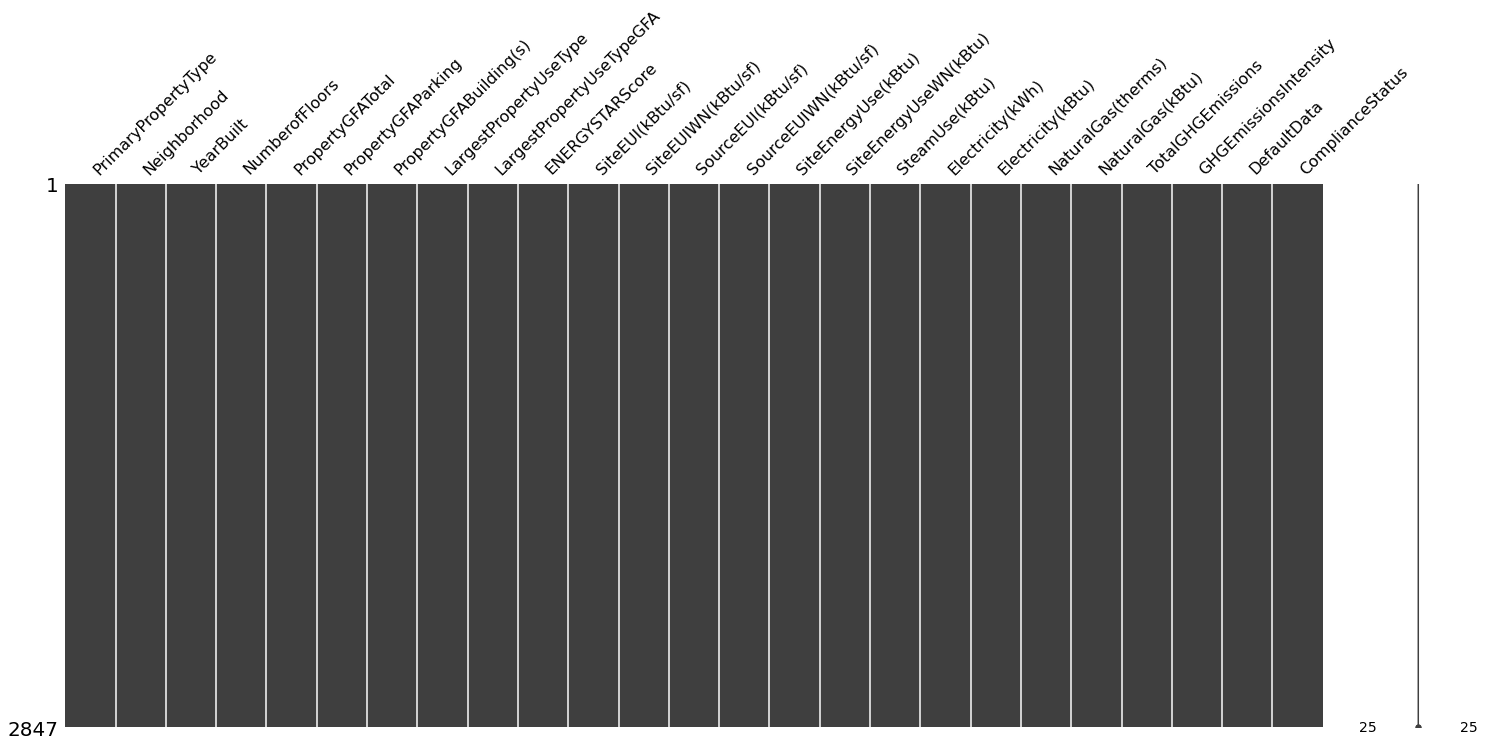

In [54]:
msg.matrix(df3)

In [55]:
pd.DataFrame(df3.isna().mean().round(4) * 100,
             columns=['Données manquantes en %'
                      ]).sort_values(by='Données manquantes en %',
                                     ascending=False)

Données manquantes en %
PrimaryPropertyType                            0.0
SourceEUIWN(kBtu/sf)                           0.0
DefaultData                                    0.0
GHGEmissionsIntensity                          0.0
TotalGHGEmissions                              0.0
NaturalGas(kBtu)                               0.0
NaturalGas(therms)                             0.0
Electricity(kBtu)                              0.0
Electricity(kWh)                               0.0
SteamUse(kBtu)                                 0.0
SiteEnergyUseWN(kBtu)                          0.0
SiteEnergyUse(kBtu)                            0.0
SourceEUI(kBtu/sf)                             0.0
Neighborhood                                   0.0
SiteEUIWN(kBtu/sf)                             0.0
SiteEUI(kBtu/sf)                               0.0
ENERGYSTARScore                                0.0
LargestPropertyUseTypeGFA                      0.0
LargestPropertyUseType                         0.0
PropertyGFABuilding(s)                         0.0
PropertyGFAParking                             0.0
PropertyGFATotal                               0.0
NumberofFloors                                 0.0
YearBuilt                                      0.0
ComplianceStatus                               0.0

On constate qu'on a plus de valeur Nan dans notre DF

On peut donc à présent exporter nos cleaned dans un fichier csv afin qu'on ait plus refaire toute le traitement ci-dessus

In [57]:
df3.head(3)

PrimaryPropertyType Neighborhood  YearBuilt  NumberofFloors  \
0               Hotel     DOWNTOWN       1927            12.0   
1               Hotel     DOWNTOWN       1996            11.0   
2               Hotel     DOWNTOWN       1969            41.0   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   
2            961990                   0                  961990   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  ENERGYSTARScore  \
0                  Hotel                    88434.0             65.0   
1                  Hotel                    83880.0             51.0   
2                  Hotel                   757243.0             18.0   

   SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0              78.9                80.3               173.5   
1              94.4                99.0               191.3   
2              96.6                99.7               242.7   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0                 175.1            6981428.0              7097539.0   
1                 195.2            8354235.0              8765788.0   
2                 246.5           73130656.0             75506272.0   

   SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
0       2023032.0         1080307.0          3686160.0             12724.0   
1             0.0         1144563.0          3905411.0             44490.0   
2      19660404.0        14583930.0         49762435.0             37099.0   

   NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity DefaultData  \
0         1272388.0             249.43                   2.64          No   
1         4448985.0             263.51                   2.38          No   
2         3709900.0            2061.48                   1.92         Yes   

  ComplianceStatus  
0        Compliant  
1        Compliant  
2        Compliant

<AxesSubplot:ylabel='None'>

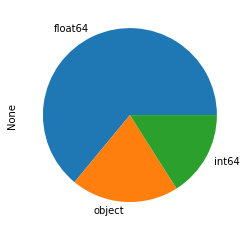

In [56]:
df3.dtypes.value_counts().plot.pie()

### 2 - Traitement des doublons

In [179]:
#df3.apply(lambda col: col.unique())

### On vérifie si on a pas de doublons

In [58]:
df3.duplicated().value_counts()

False    2847
dtype: int64

In [59]:
df3[df3.duplicated()]

Empty DataFrame
Columns: [PrimaryPropertyType, Neighborhood, YearBuilt, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), LargestPropertyUseType, LargestPropertyUseTypeGFA, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), TotalGHGEmissions, GHGEmissionsIntensity, DefaultData, ComplianceStatus]
Index: []

## ANALYSE EXPLORATOIRE

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
import numpy as np

### ANALYSE MULTIVARIEE

<AxesSubplot:>

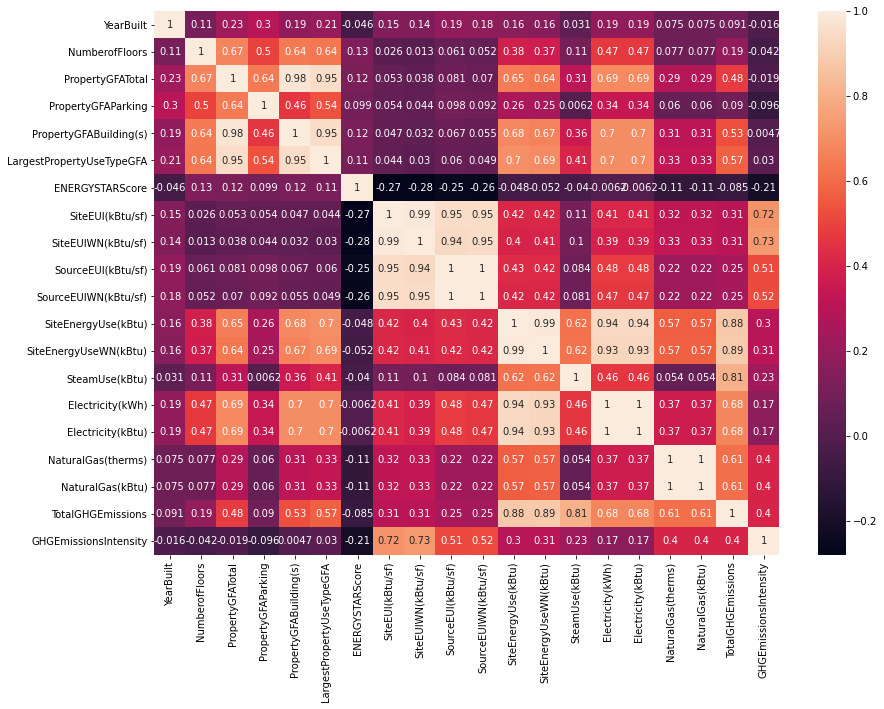

In [110]:
plt.figure(figsize=(14,10))
sns.heatmap(df3.corr(), annot=True)

In [111]:
df3.corr().shape

(20, 20)

On remarque tout de suite qu'on a pas toutes le colonnes de notre DF, 
en l'occurence ce sont les colonnes à valeurs catégorielle.

la methode corr() ne parvient pas faire la corrélation entre des valeurs numeriques et des valeurs catégorielles

Nous allons donc proceder à transformation des valeurs catégorielles en valeur numériques
pour non seulement voir la corrélation mais aussi pour l'application de algorithmes de machine learning, la prochaine étape de notre travail ...

In [112]:
df3.select_dtypes('object').head(3)

PrimaryPropertyType Neighborhood LargestPropertyUseType DefaultData  \
0               Hotel     DOWNTOWN                  Hotel          No   
1               Hotel     DOWNTOWN                  Hotel          No   
2               Hotel     DOWNTOWN                  Hotel         Yes   

  ComplianceStatus  
0        Compliant  
1        Compliant  
2        Compliant

In [113]:
del df3['LargestPropertyUseType']
del df3['DefaultData']
del df3['ComplianceStatus']

In [114]:
from sklearn.preprocessing import LabelEncoder

In [115]:
df3['PrimaryPropertyType'] = LabelEncoder().fit_transform(df3['PrimaryPropertyType'])

In [116]:
df3['Neighborhood'] = LabelEncoder().fit_transform(df3['Neighborhood'])

In [117]:
df3.select_dtypes('object').head(3)

Empty DataFrame
Columns: []
Index: [0, 1, 2]

In [118]:
df3.head(3)

PrimaryPropertyType  Neighborhood  YearBuilt  NumberofFloors  \
0                    4             5       1927            12.0   
1                    4             5       1996            11.0   
2                    4             5       1969            41.0   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   
2            961990                   0                  961990   

   LargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                    88434.0             65.0              78.9   
1                    83880.0             51.0              94.4   
2                   757243.0             18.0              96.6   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0                80.3               173.5                 175.1   
1                99.0               191.3                 195.2   
2                99.7               242.7                 246.5   

   SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
0            6981428.0              7097539.0       2023032.0   
1            8354235.0              8765788.0             0.0   
2           73130656.0             75506272.0      19660404.0   

   Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  \
0         1080307.0          3686160.0             12724.0         1272388.0   
1         1144563.0          3905411.0             44490.0         4448985.0   
2        14583930.0         49762435.0             37099.0         3709900.0   

   TotalGHGEmissions  GHGEmissionsIntensity  
0             249.43                   2.64  
1             263.51                   2.38  
2            2061.48                   1.92

On voit bien que nos variables catégorielles ont bien été encodées

### Supprimons les variables trop corrélées avec nos target : OK

On va dire trop corrélée c'est 70 % et plus de corr

In [131]:
# Selection des colonnes trop corrélées avec la target 'SiteEnergyUse(kBtu)' à l'aide du list comprehension
var_trop_corr_S = []
[var_trop_corr_S.append(df3.corr()['SiteEnergyUse(kBtu)'].index[i]) for i in range(len(df3.corr()['SiteEnergyUse(kBtu)'].index)) if df3.corr()['SiteEnergyUse(kBtu)'].values[i] >= .7]

[None, None, None, None, None, None]

In [132]:
var_trop_corr_S

['LargestPropertyUseTypeGFA',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'TotalGHGEmissions']

In [133]:
# Selection des colonnes trop corrélées avec la target 'SiteEnergyUse(kBtu)' à l'aide du list comprehension
var_trop_corr_T = []
[var_trop_corr_T.append(df3.corr()['TotalGHGEmissions'].index[i]) for i in range(len(df3.corr()['TotalGHGEmissions'].index)) if df3.corr()['TotalGHGEmissions'].values[i] >= .7]

[None, None, None, None]

In [134]:
var_trop_corr_T

['SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'TotalGHGEmissions']

In [135]:
l_var_tr_corr = list(set(var_trop_corr_S + var_trop_corr_T))

In [136]:
# On supprime les colonnes 'SiteEnergyUse(kBtu)' et 'TotalGHGEmissions' des colonnes trop corrélées à supprimer 

print(l_var_tr_corr.pop(0))
l_var_tr_corr.pop(-1)

SiteEnergyUse(kBtu)


'TotalGHGEmissions'

In [139]:
df3 = df3.drop(columns=l_var_tr_corr)

Affichons de nouveau la matrice de corrélation

<AxesSubplot:>

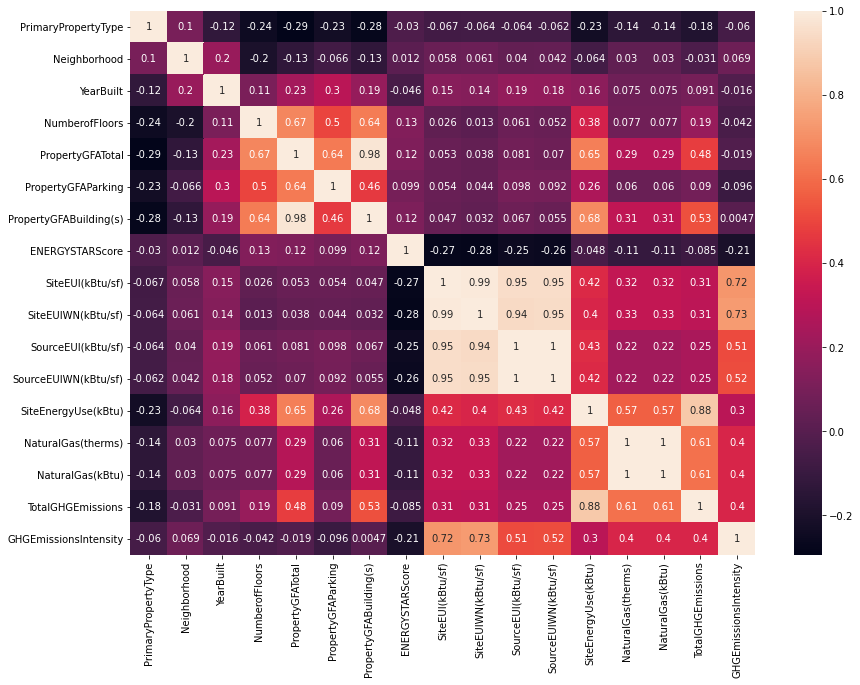

In [140]:
plt.figure(figsize=(14,10))
sns.heatmap(df3.corr(), annot=True)

### ANALYSE UNIVARIE de nos Variables


In [143]:
df3.shape

(2847, 17)

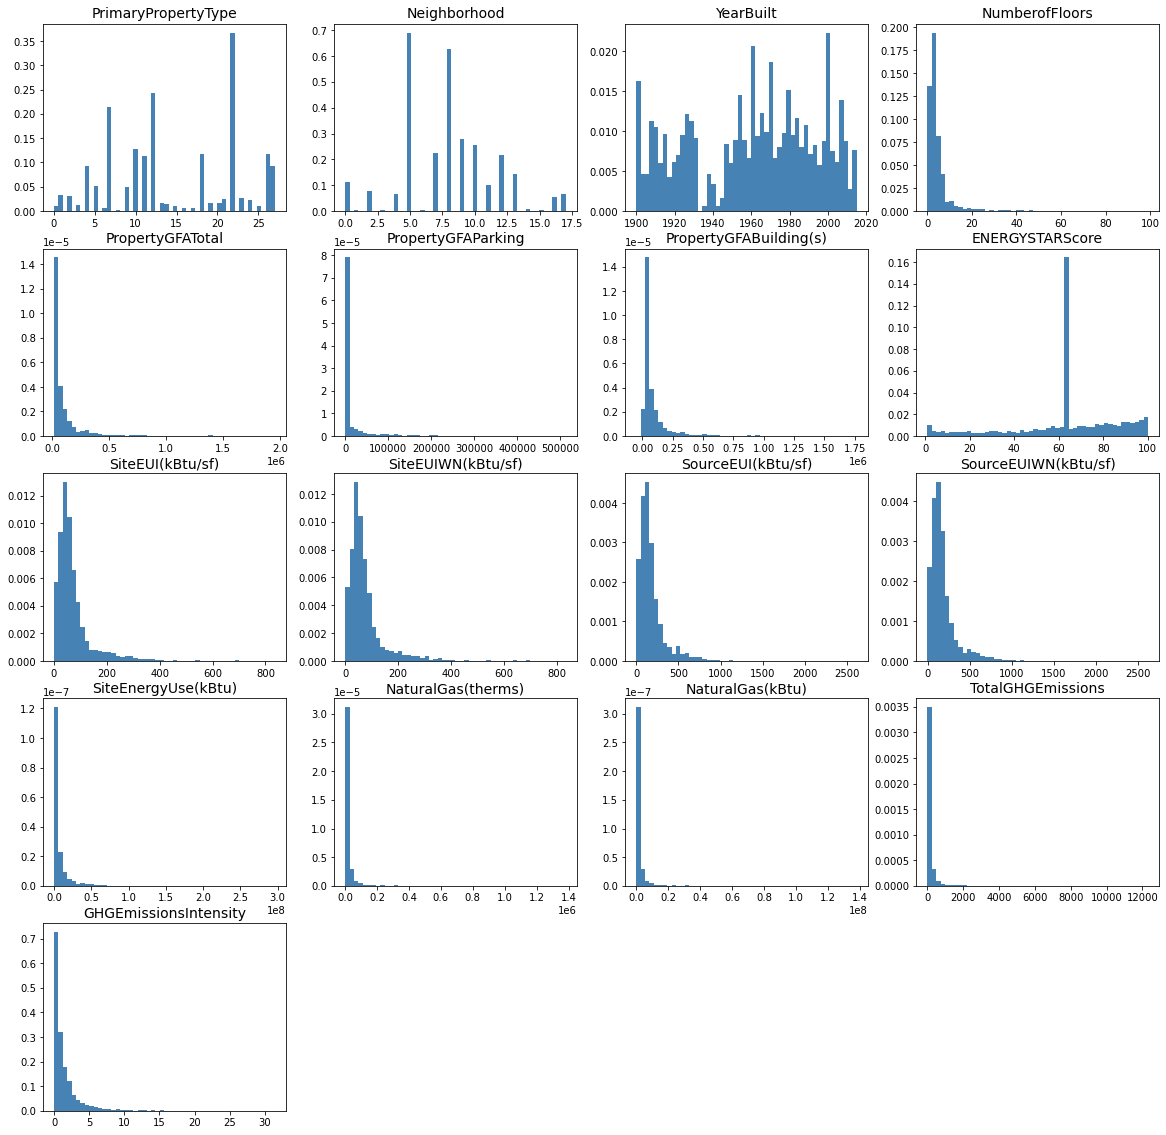

In [144]:
#On peut maintenant afficher un histogramme pour chacune de nos variables :

fig = plt.figure(figsize=(20, 20))
for feat_idx in range(df3.values.shape[1]):
    ax = fig.add_subplot(5,4, (feat_idx+1))
    h = ax.hist(df3.values[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(df3.columns[feat_idx], fontsize=14)

On remarque tout de suite qu'aucune de ces distributions n'est centré en 0 et semble pas avoir d'écart-type égale à 1.
On remarque en particulier que ces variables prennent des valeurs dans des ensembles différents. Par exemple, “PropertyGFAParking” varie de 0 à 200000 tandis que “NumberofFloor” varie de 0 à 100. 
On voit aussi que ce sont toutes des distribution asymétriques (skewed)

Donc elles n'ont pas été standardisées

Il va donc nous falloir standardiser les données pour que la première ne domine pas complètement la deuxième.

In [ ]:
df3.to_csv('Data_Cleaned.csv')